In [2]:
"""
Created on Wed Sep 15 19:40:52 2021

@author: G. Cao
"""

#importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import warnings
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

warnings.filterwarnings('ignore')


In [4]:
#making a small dataset for the visualization purpose 

X, y = make_classification(n_samples=50, n_features=3, n_informative=3,n_redundant=0,n_classes=2, weights=[0.6],
                           random_state=15)   

In [5]:
#splitting the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15,stratify=y)


In [6]:
#hyperparameter tuning

random_search = {"max_depth": list(range(2,7))+[None],
              "min_samples_leaf": range(3,10),
              "min_samples_split":range(3,10),
              "criterion": ["gini", "entropy"],
               }
                
clf=DecisionTreeClassifier()

In [7]:
model1 = RandomizedSearchCV(clf,param_distributions=random_search,cv=4,random_state=15,n_jobs=-1,n_iter=2,scoring="accuracy")
model1.fit(X_train,y_train)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5, 6, None],
                                        'min_samples_leaf': range(3, 10),
                                        'min_samples_split': range(3, 10)},
                   random_state=15, scoring='accuracy')

In [8]:
#getting the best estimator from RandomizedSearchCV

m1=model1.best_estimator_

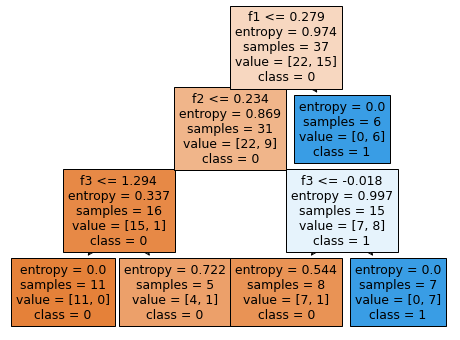

In [9]:
#plotting the tree using scikit learn plot_tree function

# m1=DecisionTreeClassifier(ccp_alpha=0.0001)
# m1.fit(X_train,y_train)
plt.figure(figsize=(8,6))
plot_tree(m1,feature_names=['f1','f2','f3'],class_names=['0','1'],filled=True);